# Penalized Cox_hazard proportional models

In [1]:
pip install -r requeriments_surv.txt

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import json
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

%matplotlib inline

from pysurv_utils import *

# Set experiment parameters

In [19]:
# Directoy params template
with open('coxnet_setup.json', 'r') as f:
    params = json.load(f)
    
params['tp']="tp1"
base_directory = '/app/Data/_Brain/Radiology/_Adult/_Glioma/'
params['out_folder']="_Survival_prediction_Baseline"

# Cross validation set up
params['train_ids']=[0,1,3,4]
params['test_ids']=[2]
params['subsampling_test']=False
params['val_fraction']=0.15
params['random_state']=1
params['n_splits']=10
# hold out validation
params['run_test']=True
# cox parameters
params['lambda_l1']=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
params['n_alphas']=30
params['alpha_min']=0.1
params['mx_iters']=100
params['var_threshold']=0.0000001
params['n_jobs']=18
# feature familiy
params["mat_str"]="annots.csv"
features=["feat18"]
mri_modalities=["T2T1c"]
rois=["RoI3"]
non_modality_feature=False
clinical_features=True

### **Loop for features /modalities/ habitats (Rois)** 


>>>>>>>>>>>>>>>>>>>>>>>>>>> Data Loader


Regression method .... coxnet
Experiment folder .... _Survival_prediction_Baseline
Main out folder   .... CCF
Hold out set      .... CCF
Training_set      .... UCSF-PDGM_LUMIERE_IVYGAP_xCures
MRI modality      .... T2T1c
Tumor habitat     .... All_tumor
Feature familily   ... DemoClinics
coxnet settings
Variance threshold ... 1e-07
lambda_L1 ratios   ... [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
n_alphas coeff     ... 30
max num iters      ... 100
alpha_min ration   ... 0.1

reading train set .... 
/app/Data/_Brain/Radiology/_Adult/_Glioma/UCSF-PDGM/Feature_extraction/Feature_matrix/Baseline/UCSF-PDGM_DemoClinics_annots.csv
/app/Data/_Brain/Radiology/_Adult/_Glioma/LUMIERE/Feature_extraction/Feature_matrix/Baseline/LUMIERE_DemoClinics_annots.csv
/app/Data/_Brain/Radiology/_Adult/_Glioma/IVYGAP/Feature_extraction/Feature_matrix/Baseline/IVYGAP_DemoClinics_annots.csv
/app/Data/_Brain/Radiology/_Adult/_Glioma/xCures/Feature_extraction/Feature

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:473: ConvergenceWarning: Optimization terminated early, you might want to increase the number of iterations (max_iter=100).
  self._final_estimator.fit(Xt, y, **last_step_params["fit"])
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:473: UserWarning: all coefficients are zero, consider decreasing alpha.
  self._final_estimator.fit(Xt, y, **last_step_params["fit"])
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:473: UserWarning: all coefficients are zero, consider decreasing alpha.
  self._final_estimator.fit(Xt, y, **last_step_params["fit"])
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:473: UserWarning: all coefficients are zero, consider decreasing alpha.
  self._final_estimator.fit(Xt, y, **last_step_params["fit"])
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:473: UserWarning: all coefficients are zero, consider decreasing alpha.
  self._final_estimator.fit(Xt, y, **las

Number of non-zero coefficients: 3
 Results stored in /app/Data/_Brain/Radiology/_Adult/_Glioma/CCF/_Survival_prediction_Baseline/training_UCSF-PDGM_LUMIERE_IVYGAP_xCures/All_tumor_DemoClinics/CCF_T2T1c_varThres_1e-07_cv_train.json
 Results stored in /app/Data/_Brain/Radiology/_Adult/_Glioma/CCF/_Survival_prediction_Baseline/training_UCSF-PDGM_LUMIERE_IVYGAP_xCures/All_tumor_DemoClinics/CCF_T2T1c_varThres_1e-07_top_featueres.csv

High and Low Rsik split
C-index 1: 0.6918902871468391
C-index 2: 0.6918902871468391
Log-rank test p-value: 7.524629368862138e-21


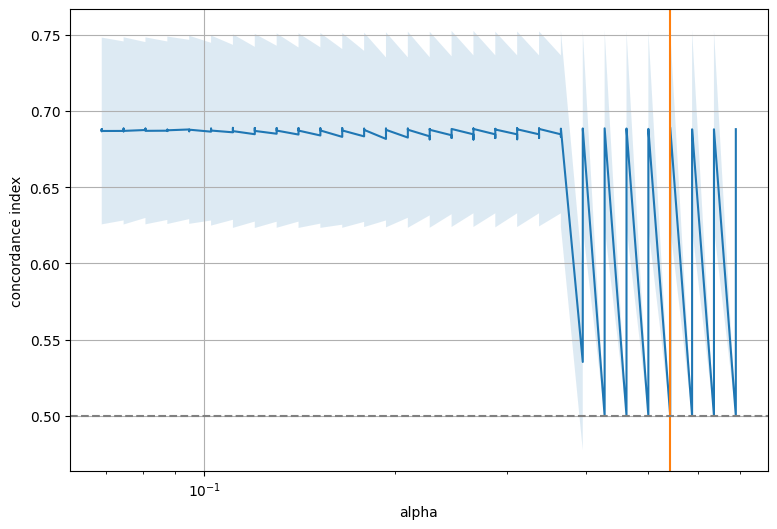

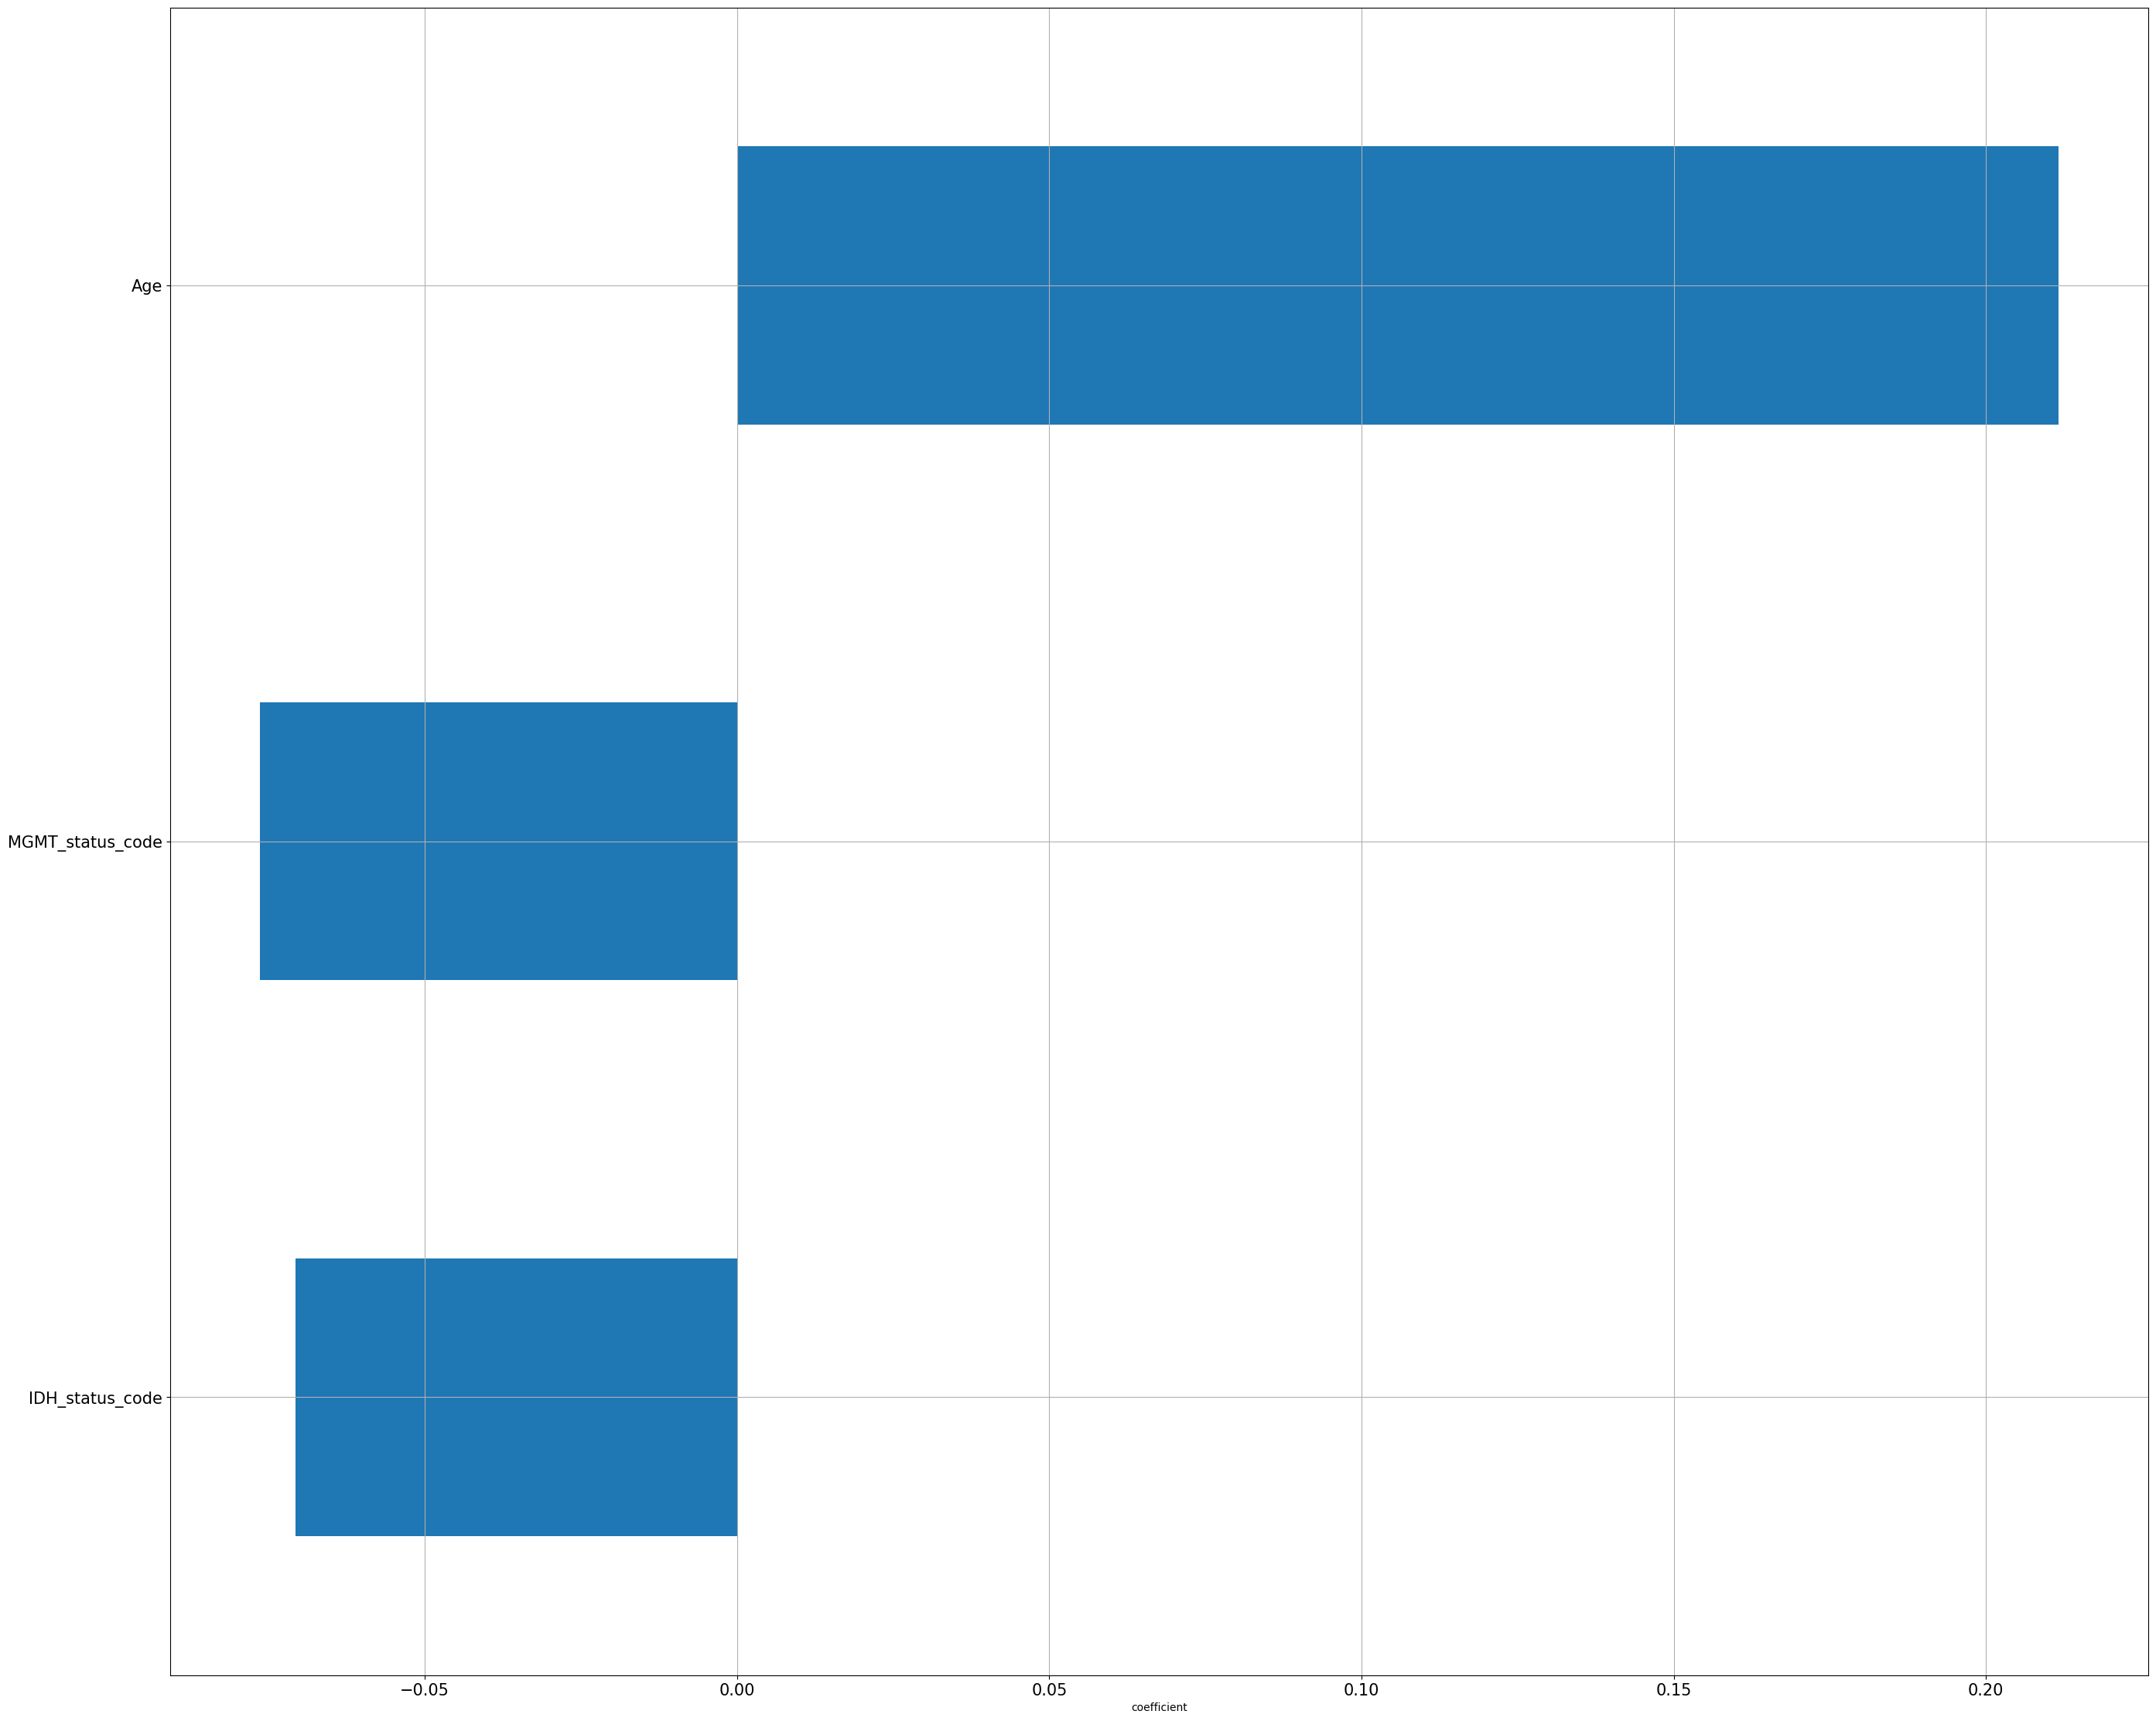

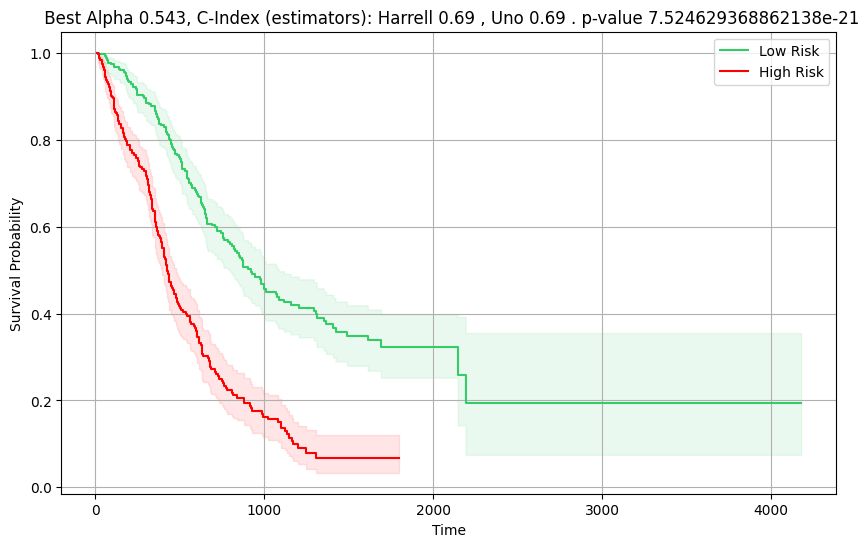


>>>>>>>>>>>>>>>>>>> Hold-out test 

... Variance Threshold ...
... selecting training features on testing set ...
Dimensions original set of features  (51, 4)
Dimensions After  variance Threshold (51, 4),  var_threshold 1e-07

High and Low Rsik split
C-index 1: 0.5769835035349568
C-index 2: 0.5769835035349568
Log-rank test p-value: 0.16173886294196682


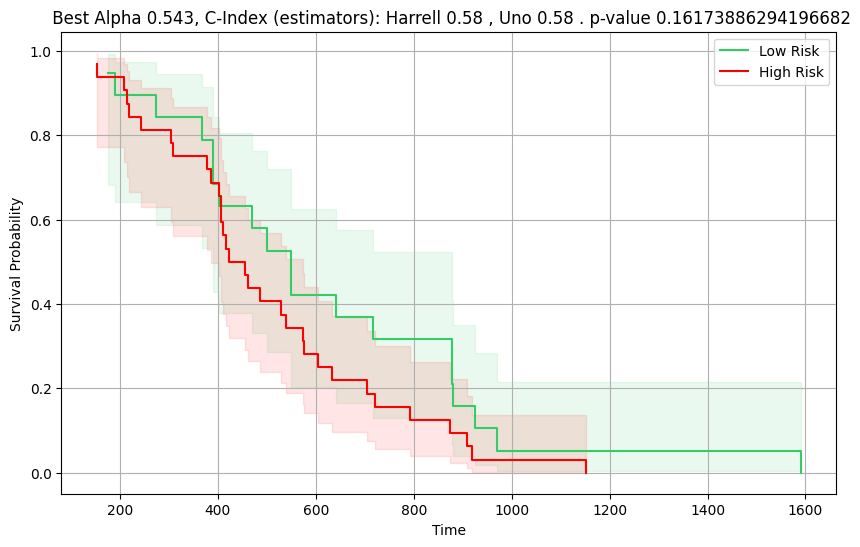

 Results stored in /app/Data/_Brain/Radiology/_Adult/_Glioma/CCF/_Survival_prediction_Baseline/training_UCSF-PDGM_LUMIERE_IVYGAP_xCures/All_tumor_DemoClinics/CCF_T2T1c_varThres_1e-07_results.json

>>>>>>>>>>>>>>>>> finished :  T2T1c, RoI3


In [20]:
for feat in features:
    params['feature']=feat

    for mri_mod in mri_modalities:
        params['mri_mod']=mri_mod

        for roi in rois:
            params['habitat']=roi

            DataLoader = DataSurvLoader(base_directory)
            DataLoader.setup_logger(**params) # write a log file txt
            output_base = DataLoader.FileTags(**params)
            csv_paths   = DataLoader.get_annotated_csv_paths(**params, non_modality=non_modality_feature, clinical_predictors=clinical_features) # include modality free features (shape and GLIodil)

            train_data_df, nan_idx = DataLoader.load_annotated_featuremat(csv_paths,train_mat=True, **params)
            test_df, _ = DataLoader.load_annotated_featuremat(csv_paths, nan_columns_index=nan_idx , **params)

            if test_df.isnull().any().any():
                print(f"\n>>>>>>>>>>>>>>>>> {mri_mod}, {roi} still contains NaN Values after nan removal by training index")
                continue

            data_annots, Train_Val_Test_IDs = DataLoader.survival_annots(train_data_df, test_df)

            print(f"\n>>>>>>>>>>>>>>>>>>> training set ")
            Ytrain=data_annots[0] # first index for training
            Xtrain=DataLoader.load_featuremat(train_data_df,**params)
            Xtrain_selected, variance_selected = DataLoader.Varthreshold(Xtrain,train_mat=True)

            CoxModel    =  CoxNetSurvival(**params)
            obj, gcv    =  CoxModel.TrainCV(Xtrain_selected, Ytrain)
            _, best_coefs, mean_cv, std_cv = CoxModel.TrainLogger(Xtrain_selected,output_base,DataLoader)
            
            if params['run_test']:
                
                risk_scores_train,  coxnet_model   = CoxModel.TrainedModel(Xtrain_selected,Y_annots=Ytrain)
                C_harrell_1_train, C_harrell_2_train, p_value_train = CoxModel.Performance_metrics(Xtrain_selected, Ytrain, risk_scores_train)
                threshold_value=np.median(risk_scores_train)
                CoxModel.KMSurvival_curves(output_base,test=False)

                print(f"\n>>>>>>>>>>>>>>>>>>> Hold-out test ")

                Ytest=data_annots[1]
                Xtest=DataLoader.load_featuremat(test_df,**params)
                Xtest_selected, _ = DataLoader.Varthreshold(Xtest,selected_features=variance_selected)

                risk_scores_test,  _  = CoxModel.TrainedModel(Xtest_selected, test=True, coxnet_pred=coxnet_model)
                C_harrell_1_test, C_harrell_2_test, p_value_test = CoxModel.Performance_metrics(Xtest_selected, Ytest, risk_scores_test, 
                                                                                                test=True, risk_threshold=threshold_value)
                CoxModel.KMSurvival_curves(output_base,test=True)
                CoxModel.Save_SurvMetrics(risk_scores_test, test_df, output_base)

            print(f"\n>>>>>>>>>>>>>>>>> finished :  {mri_mod}, {roi}")

# Write a performance summary across experiments

# fin 

## ** Igonre from here: Alpha Discovery:Grid search Train 5 fold-cv, validation and Hold-out test** 

In [71]:
# train_df, val_df = DataLoader.dataframe_randsplit(train_data_df, random_state=1, **params)
# data_annots, Train_Val_Test_IDs = DataLoader.survival_annots(train_df, val_df, test_df)
# Stnd_train, fitted_scaler = DataLoader.feature_standardization(train_df, train_mat=True, **params)
# Stnd_val, _ = DataLoader.feature_standardization(val_df, fitted_scaler,train_mat=False, **params)